In [70]:
# Data Handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch

# Data Visualization
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline

# Pattern Matching
import re

# ML Models
from sklearn.tree import DecisionTreeClassifier
import torch.nn as nn 
import torch.functional as F

# Model Evaluation Metrices 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
# Data Loading
data = pd.read_csv("mushrooms.csv").dropna()

In [72]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [73]:
# Renaming Columns

columns = list(data.columns)

NewColumnNames = {}

for col in columns:
    regex = "-"
    pattern = re.findall(regex, col)
    if len(pattern) != 0:
        NewColumnNames[col] = col.replace("-", "")

In [74]:
data = data.rename(columns = NewColumnNames)
data.head()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [75]:
# Dependant and independent feature split 

X = data.drop(columns=["class"])
y = data["class"]

In [76]:
# get the unique value of columns for encoding

for col in data.columns:
    print(f"{col} --> {len(data[col].unique())}")

class --> 2
capshape --> 6
capsurface --> 4
capcolor --> 10
bruises --> 2
odor --> 9
gillattachment --> 2
gillspacing --> 2
gillsize --> 2
gillcolor --> 12
stalkshape --> 2
stalkroot --> 5
stalksurfaceabovering --> 4
stalksurfacebelowring --> 4
stalkcolorabovering --> 9
stalkcolorbelowring --> 9
veiltype --> 1
veilcolor --> 4
ringnumber --> 3
ringtype --> 5
sporeprintcolor --> 9
population --> 6
habitat --> 7


In [77]:
# Encoding the features using Label Encoder

encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype is np.dtype("object"):
        X[col] = encoder.fit_transform(X[col])

X.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [78]:
# Label Encoding target column
y = encoder.fit_transform(y)

In [79]:
# converting target column to tensor
y = np.stack(y)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
y

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [94]:
# converting the array of features to tensors
Features = torch.tensor(X.values, dtype=torch.float32)
Features


tensor([[5., 2., 4.,  ..., 2., 3., 5.],
        [5., 2., 9.,  ..., 3., 2., 1.],
        [0., 2., 8.,  ..., 3., 2., 3.],
        ...,
        [2., 2., 4.,  ..., 0., 1., 2.],
        [3., 3., 4.,  ..., 7., 4., 2.],
        [5., 2., 4.,  ..., 4., 1., 2.]])

In [95]:
print(Features.shape)
print(y.shape)

torch.Size([8124, 22])
torch.Size([8124, 1])


In [96]:
# TRAIN TEST SPLIT
batch_size = 8123
test_size = int(round((0.20 * batch_size), 0))

print(test_size)

1625


In [97]:
X_train = Features[:batch_size - test_size]
X_test = Features[batch_size - test_size : batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [172]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

torch.Size([6498, 22])
torch.Size([1625, 22])
torch.Size([6498, 1])
torch.Size([1625, 1])


CONSTRUCTING NETWORK

In [199]:
class Network(nn.Module):

    def __init__(self, inp_size, out_size, layers):
        super().__init__()

        self.layer_list = []

        for layer in layers:
            self.layer_list.append(nn.Linear(inp_size, layer))
            self.layer_list.append(nn.ReLU())
            inp_size = layer

        self.layer_list.append(nn.Linear(layers[-1], out_size))
        self.layer_list.append(nn.Sigmoid())
    
        self.Net = nn.Sequential(*self.layer_list)

    def forward(self, x):
        out = self.Net(x)
        return out

In [200]:
torch.manual_seed(100)
Net = Network(Features.shape[1], 1, [100, 50])

In [201]:
Net

Network(
  (Net): Sequential(
    (0): Linear(in_features=22, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [202]:
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(Net.parameters(), lr=0.01, momentum=0.9)

In [203]:
epochs = 3000
final_loss = []

for i in range(epochs):
    Net.train()
    i = i + 1
    y_pred = Net(X_train)
    # y_pred = torch.max(y_pred, dim=1, keepdim=True)[0]
    # y_pred = y_pred.detach().numpy()
    # y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1).astype("float")
    # y_pred = torch.tensor(y_pred, dtype=torch.float32)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if i % 10 == 1:
        print(f"epochs : {i}, loss : {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 1, loss : 0.6760194301605225
epochs : 11, loss : 0.6381077170372009
epochs : 21, loss : 0.5852514505386353
epochs : 31, loss : 0.5268877148628235
epochs : 41, loss : 0.4684689939022064
epochs : 51, loss : 0.4151608347892761
epochs : 61, loss : 0.3677843511104584
epochs : 71, loss : 0.3305422067642212
epochs : 81, loss : 0.2994057238101959
epochs : 91, loss : 0.27174079418182373
epochs : 101, loss : 0.24710366129875183
epochs : 111, loss : 0.22490735352039337
epochs : 121, loss : 0.20475001633167267
epochs : 131, loss : 0.18647395074367523
epochs : 141, loss : 0.16998355090618134
epochs : 151, loss : 0.15506504476070404
epochs : 161, loss : 0.1415243297815323
epochs : 171, loss : 0.12920448184013367
epochs : 181, loss : 0.11796167492866516
epochs : 191, loss : 0.10785327106714249
epochs : 201, loss : 0.09870105981826782
epochs : 211, loss : 0.0904279351234436
epochs : 221, loss : 0.08296271413564682
epochs : 231, loss : 0.07624267041683197
epochs : 241, loss : 0.070187985897064

Text(0.5, 0, 'epoch')

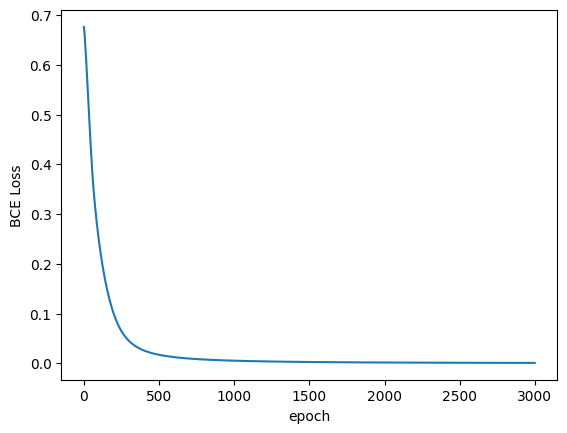

In [205]:
values = [t.item() for t in final_loss]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), values)
plt.ylabel('BCE Loss')
plt.xlabel('epoch')

In [206]:
with torch.no_grad():
    y_pred = Net(X_test)
    loss = loss_function(y_pred, y_test)

print(f"loss ---> {loss}")

loss ---> 0.05770266428589821


In [213]:
y_pred

tensor([[9.9999e-01],
        [1.0000e+00],
        [1.0000e+00],
        ...,
        [5.7309e-04],
        [7.0531e-01],
        [9.9996e-01]])

In [214]:
y_test

tensor([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])

In [215]:
predicted_labels = (y_pred >= 0.5).float()
predicted_labels

tensor([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])

In [216]:
correct_predictions = (predicted_labels == y_test).sum().item()
correct_predictions

1585

In [218]:
total_predictions = y_test.size(0)
total_predictions

1625

In [225]:
accuracy = correct_predictions / total_predictions
print(f"Accuracy : {accuracy:.2%}")

Accuracy : 97.54%
